In [77]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imghdr


C:\Users\sinel\AppData\Local\Temp\ipykernel_20588\2909785005.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [78]:
data_path = "my data"

### Removing Images with Unnecessary formats

In [79]:
img_format = ['jpg', 'jpeg', 'png', 'bmp']

In [81]:
for image_class in os.listdir(data_path): 
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_format: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list my data\happy people\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list my data\sad people\depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in ext list my data\sad people\sad-people-are-standing-rooftop-footage-092116870_iconl.jpeg


In [45]:
# for img_category in os.listdir(data_path):
#     for img in os.listdir(os.path.join(data_path, img_category)):
#         img_path = os.path.join(data_path, img_category, img)
        
#         img_type = img.split(".")[-1] # taking the extension of an image
#         if img_type not in img_format:
#             os.remove(img_path) # removing an images if their extension does't included in img_format
        

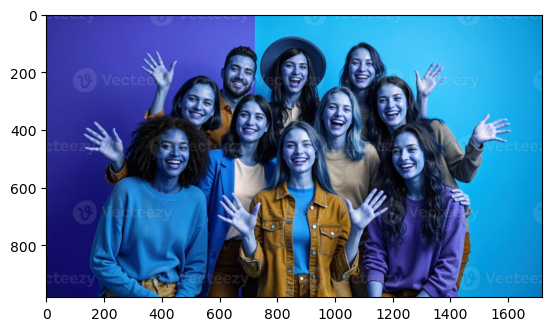

In [92]:
# let test one image

test_img = cv2.imread(os.path.join(data_path, "happy people", os.listdir(os.path.join(data_path, "happy people"))[2]))
plt.imshow(test_img)
# the reason for the change of an image color is, matplotlib read images as RGB, but cv2 read as BGR, so we need to format it properly

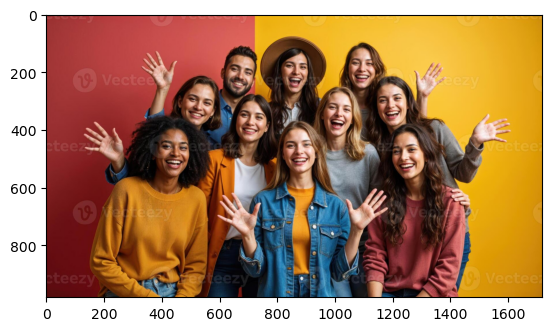

In [93]:
#RGB converted image
test_img_new = test_img = cv2.imread(os.path.join(data_path, "happy people", os.listdir(os.path.join(data_path, "happy people"))[2]))
test_img_new = cv2.cvtColor(test_img_new, cv2.COLOR_BGR2RGB)
plt.imshow(test_img_new)

#### Loading our data

In [82]:
# automatically read our datasets
my_data1 = tf.keras.utils.image_dataset_from_directory("my data")

Found 177 files belonging to 2 classes.


In [117]:
#allows to access a generator from data pipeline
numpy_iterator1 = my_data1.as_numpy_iterator()

In [118]:
# returns the data and the label
batch = numpy_iterator1.next()

# so batch[0] is the image array and batch[1] is the label( 'happy' or 'sad')

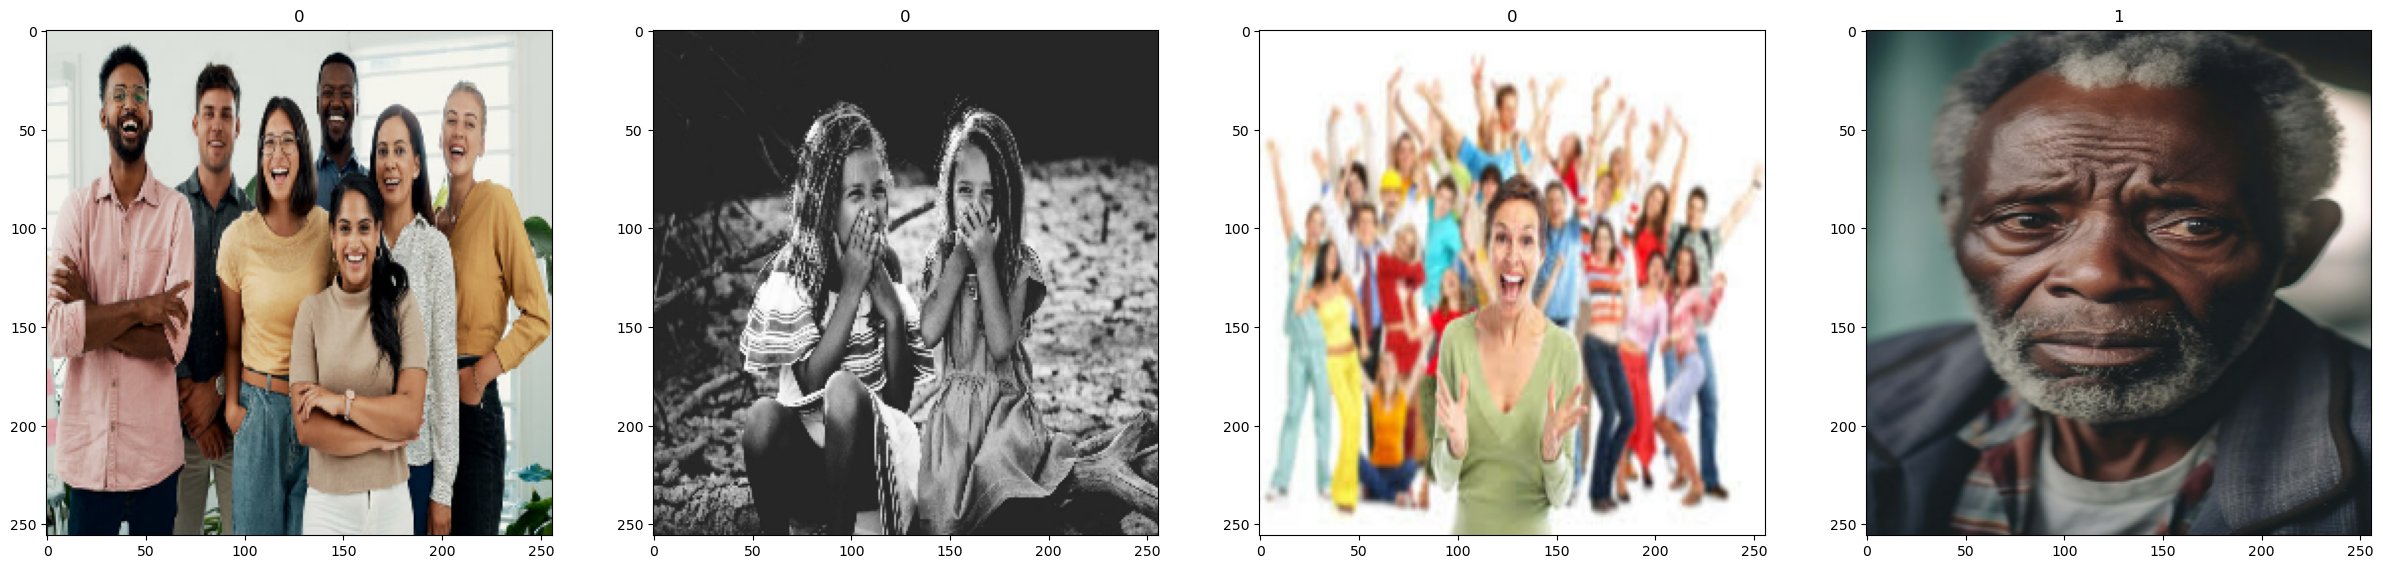

In [119]:
fig, ax=plt.subplots(ncols=4, figsize=(30,30))

for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])
# In this case 0 represent happy  and 1 represents sad

## Data Preprocessing

##### Standardization

In [84]:
my_data2 = my_data1.map(lambda x, y:(x/255, y))

In [85]:
numpy_iterator2 = my_data2.as_numpy_iterator()

In [86]:
batch2 = numpy_iterator2.next()

In [87]:
batch2[0].max()

1.0

In [88]:
batch2[0].min()

0.0

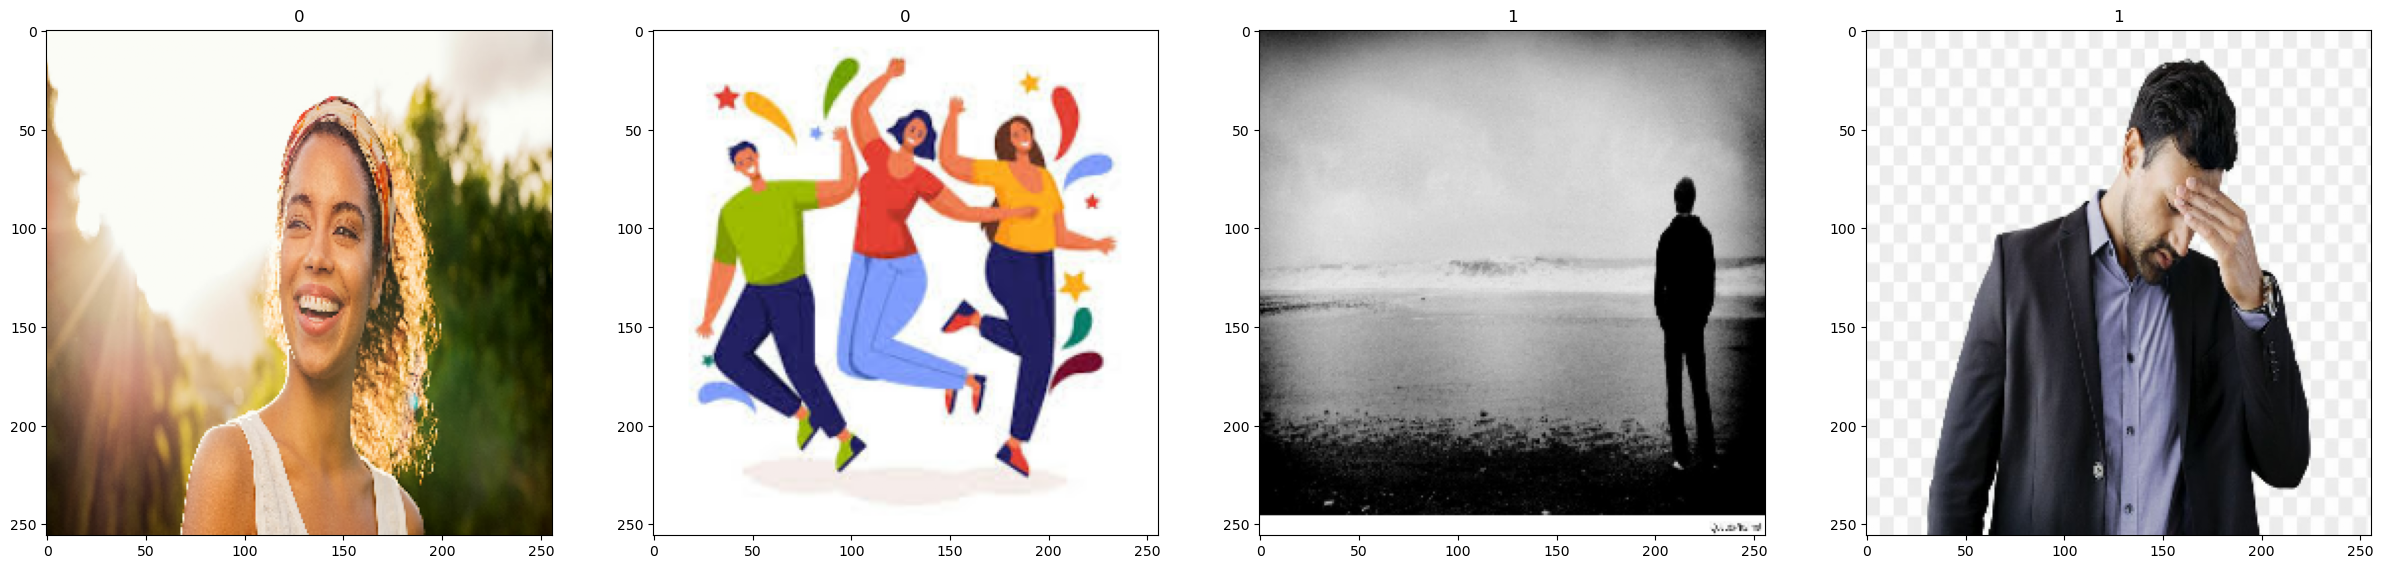

In [89]:
fig, ax=plt.subplots(ncols=4, figsize=(30,30))

for index, img in enumerate(batch2[0][:4]):
    ax[index].imshow(img)
    ax[index].title.set_text(batch2[1][index])
# In this case 0 represent happy  and 1 represents sad

### Split the Data

In [90]:
# we gonna split the data into training, validating, and testing sets 80, 10, 10 respectively
data_size = len(my_data2)
train_size = int(data_size*.7)
val_size  = int(data_size*.1) + 1
test_size = int(data_size*.1) + 1

In [91]:
train = my_data2.take(train_size)
val = my_data2.skip(train_size).take(val_size)
test = my_data2.skip(train_size + val_size).take(test_size)

In [92]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Model Building

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [94]:
#define the model
model = Sequential()

In [95]:
#building the model
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation="relu", input_shape=(256, 256, 3) )) # input layer with 16 filters, 3x3 pixels
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPool2D())

model.add(Flatten()) # convert the 2D into 1D
model.add(Dense(256, activation="relu")) #fully connected dense layer
model.add(Dense(1, activation="sigmoid")) #output layer

c:\Users\sinel\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
#compiling the model
# we are going to use Binary_Cross_Entropy, because our output will be binary
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [97]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [98]:
model.fit(train,  epochs=15, validation_data=val)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4313 - loss: 1.4244 - val_accuracy: 0.3750 - val_loss: 0.8788
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 489ms/step - accuracy: 0.5323 - loss: 0.7381 - val_accuracy: 0.8125 - val_loss: 0.6511
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 534ms/step - accuracy: 0.7125 - loss: 0.6422 - val_accuracy: 0.5938 - val_loss: 0.6242
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 598ms/step - accuracy: 0.7552 - loss: 0.5973 - val_accuracy: 0.7812 - val_loss: 0.5676
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step - accuracy: 0.7719 - loss: 0.5370 - val_accuracy: 0.8125 - val_loss: 0.4104
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8104 - loss: 0.4599 - val_accuracy: 0.8750 - val_loss: 0.3698
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7760 - loss: 0.4304 - val_accuracy: 0.7812 - val_loss: 0.4057
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7896 - loss: 0.4080 - val_accuracy: 0.8438 - val_loss: 0.3502
Epoc

### Model Evaluation

In [108]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [109]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [110]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [113]:
print(f'Accuracy: {accuracy.result().numpy()} \nPrecision: {precision.result().numpy()} \nRecall: {recall.result().numpy()}')

Accuracy: 0.9411764740943909 
Precision: 0.8571428656578064 
Recall: 1.0


### Test the Model

In [123]:
os.path.join("test data", "happy.jpg")

'test data\\happy.jpg'

In [143]:
test_img = "test data\\sad.jpg"
test_img = cv2.cvtColor(cv2.imread(test_img), cv2.COLOR_BGR2RGB)

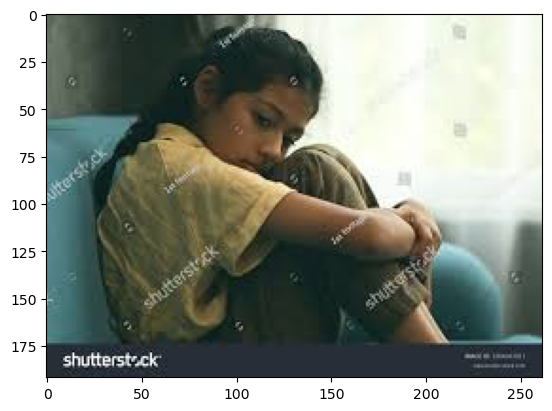

In [144]:
plt.imshow(test_img)

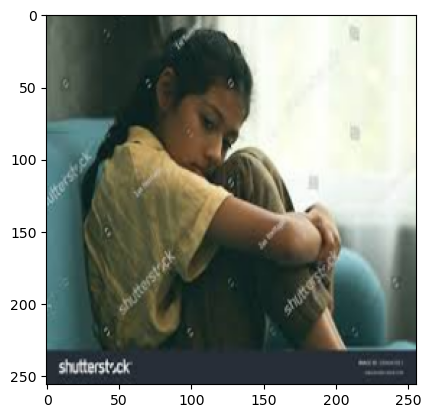

In [145]:
# resize image to (256, 256)
resized_img = tf.image.resize(test_img, (256, 256))
plt.imshow(resized_img.numpy().astype(int))

In [148]:
# scale and expand the dimension of the image and predict it

y_pred = model.predict(np.expand_dims(resized_img/255, 0))


# for binary classification if the predicted value < 0.5 images are categorized into one category, and if > 0.5 to the other category
# In our case if y_pred <0.5 the image is labeled happy and else labeled sad

if y_pred < 0.5:
    print("Happy Image")
else:
    print("Sad Image")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sad Image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Sad Image


Sad Image
